In [1]:
import pandas as pd
import numpy as np
import copy
from IPython.display import Image
import time

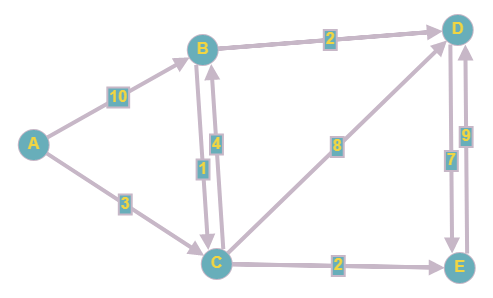

In [2]:
Image('./map.png')

In [3]:
pd.read_csv('mapData.csv',header=None)

,0,1,2,3,4
0,-1,10,3,-1,-1
1,-1,-1,1,2,-1
2,-1,4,-1,8,2
3,-1,-1,-1,-1,7
4,-1,-1,-1,9,-1


In [4]:
st_time = time.time()
data = np.array(pd.read_csv('mapData.csv',header=None))

In [5]:
graph_prime = {}
for i , row_d in enumerate(data):
    graph_prime[chr(97+i)] = {'name':chr(97+i),'pre':'','dis':float('inf')}
    temp = {}
    for j , ed in enumerate(row_d):
        if ed != -1:
            temp[chr(97+j)] = ed
    graph_prime[chr(97+i)]['con'] = temp
queue =[]
for name in graph_prime:
    queue.append(name)
source = 'a'
sink = 'd'
graph_prime[source]['dis'] = 0

In [6]:
#Finds node which has minimun distance value in the to be processed nodes
def extract_min(g,q): 
    d=[]
    for x in g:
        d.append((g[x]['dis']))
    index_min = min(range(len(d)), key=d.__getitem__)
    return(q[index_min])

#Does the process of relaxation of arcs
def relax(n,graph):
    for x in graph[n]['con']:
        if( graph[x]['dis'] > graph[n]['dis'] + graph[n]['con'][x] ):
            graph[x]['dis'] = graph[n]['dis'] + graph[n]['con'][x]
            graph[x]['pre'] = graph[n]['name']
    return graph

#Main dijkstra function
def dijkstra(graph,queue):
    
    q = queue.copy()
    g = copy.deepcopy(graph)
    for _ in range(len(graph)): 
        u = extract_min(g,q)
        graph = relax(u,graph)
        g.pop(u)
        q.remove(u)
    return graph

In [7]:
#Sorted Edge data
a_list = []
for nod in graph_prime:
    for con in graph_prime[nod]['con']:
        temp =[]
        temp.extend([nod+con,graph_prime[nod]['con'][con],0])
        a_list.append(temp)

a_list = sorted(a_list,key=lambda k:k[1])
edge_data = {}
for it , nod in enumerate(a_list):
    nod[2] = it
    edge_data[nod[0]] = nod[1:]
number_edge = len(edge_data)
initialize_zero = []
for _ in range(number_edge+1):
    initialize_zero.append(0)

In [8]:
#Helper function 
def get_edge_name(ip):
    for g , h in enumerate(edge_data):
        if g == ip:
            break
    return h

In [9]:
#Simultaneously Solving paths
def break_it(path):
    for row in range(len(path)):
        #index position ip
        for edge in range(len(path[0])-1):
            if path[row][edge] == 1:
                path[row][len(path[0])-1] = edge
                for row_vertical in range(len(path)):
                    if path[row_vertical][edge] == 1 and path[row_vertical][len(path[0])-1] < edge:
                        path[row_vertical][len(path[0])-1] = edge
                break
    return None

In [10]:
def bender(graph_prime):
    dijkstra(graph_prime,queue)
    gb = copy.deepcopy(graph_prime)
    temp_inter = []
    path = []
    it = 0
    while(1):
       
        gd = copy.deepcopy(dijkstra(gb,queue))
        
        if gd[sink]['dis'] == float('inf'):
            print("Network interdicted successfully !!!")
            print("Risky arcs: ",set(temp_inter))
            break
        print("\nIteration number: ",it+1,'\n\n')
        ### Printing Current Shortest path
        print(source+' =>',gd[sink]['name'],'Min distance =',gd[sink]['dis'])
        y = sink
        while(gd[y]['pre'] != ''):
            print(gd[y]['name'],end=" <= ")
            y = gd[y]['pre']
        print('a\n')
        ###
        #Refreshing fixed arcs in path
        for fixed in range(len(path)):
            path[fixed][len(path[0])-1] = 0
        ###
        #Refresh edge / remove temporary interdiction    
        for som in temp_inter:
            gb[som[0]]['con'][som[1]] = graph_prime[som[0]]['con'][som[1]]
        path.append(initialize_zero.copy())
        
        ##List refreshes here
        temp_inter = []
        
        #Filling path matrix
        x = sink
        while(gd[x]['pre'] != ''):
            path[it][edge_data[gd[x]['pre'] + x][1]] = 1
            x = gd[x]['pre']
        
        break_it(path)
        for _ in range(len(path)):
            name = get_edge_name(path[_][len(path[0])-1])
            temp_inter.append(name)
            gb[name[0]]['con'][name[1]] = float('inf')
        
        #refreshing distance in gb
        for dis in gb:
            gb[dis]['dis'] = float('inf')
        gb[source]['dis'] = 0
        print('>>>>>',set(temp_inter))
        it += 1
    return path

In [11]:
path = bender(graph_prime)


Iteration number:  1 


a => d Min distance = 9
d <= b <= c <= a

>>>>> {'bd'}

Iteration number:  2 


a => d Min distance = 11
d <= c <= a

>>>>> {'ac'}

Iteration number:  3 


a => d Min distance = 12
d <= b <= a

>>>>> {'ac', 'bd'}

Iteration number:  4 


a => d Min distance = 19
d <= c <= b <= a

>>>>> {'ac', 'bd', 'bc'}
Network interdicted successfully !!!
Risky arcs:  {'ac', 'bd', 'bc'}


In [12]:
print("Run time: ",time.time()-st_time,'s')

Run time:  0.9266910552978516 s
